In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

- Note - Your code/analysis should be self-explanatory with necessary comments.  


- Create a story with visualizations. We encourage you to use any Python packages like pandas, matplotlib, seaborn, or plotly. Your story must answer the following to receive full credit:
    - What are your initial thoughts on the dataset? 
    - What do you think can be mined from the dataset?
    - What are the hypotheses that you can make?
    - What are your observations based on plots ( at least 10 plots)
- Your story should follow continuity from the previous step to the next step and explanations for every plot/analysis.
- Find an exciting dataset in Kaggle, create visualizations, and write a story. You can manipulate the data as needed. In order to receive full credit, make sure to address all the questions from the above question.

In [2]:
df = pd.read_csv('Fatalities.csv', index_col=0)

In [3]:
df.head()

,state,year,spirits,unemp,income,emppop,beertax,baptist,mormon,drinkage,...,nfatal2124,afatal,pop,pop1517,pop1820,pop2124,milestot,unempus,emppopus,gsp
1,al,1982,1.37,14.4,10544.152344,50.692039,1.539379,30.355700,0.32829,19.00,...,32,309.437988,3942002.25,208999.593750,221553.43750,290000.06250,28516.0,9.7,57.799999,-0.022125
2,al,1983,1.36,13.7,10732.797852,52.147030,1.788991,30.333599,0.34341,19.00,...,35,341.834015,3960008.00,202000.078125,219125.46875,290000.15625,31032.0,9.6,57.900002,0.046558
3,al,1984,1.32,11.1,11108.791016,54.168087,1.714286,30.311501,0.35924,19.00,...,34,304.872009,3988991.75,196999.968750,216724.09375,288000.15625,32961.0,7.5,59.500004,0.062798
4,al,1985,1.28,8.9,11332.626953,55.271137,1.652542,30.289499,0.37579,19.67,...,45,276.742004,4021007.75,194999.734375,214349.03125,284000.31250,35091.0,7.2,60.100002,0.027490
5,al,1986,1.23,9.8,11661.506836,56.514496,1.609907,30.267401,0.39311,21.00,...,29,360.716003,4049993.75,203999.890625,212000.00000,263000.28125,36259.0,7.0,60.700001,0.032143


In [4]:
df.dtypes

state            object
year              int64
spirits         float64
unemp           float64
income          float64
emppop          float64
beertax         float64
baptist         float64
mormon          float64
drinkage        float64
dry             float64
youngdrivers    float64
miles           float64
breath           object
jail             object
service          object
fatal             int64
nfatal            int64
sfatal            int64
fatal1517         int64
nfatal1517        int64
fatal1820         int64
nfatal1820        int64
fatal2124         int64
nfatal2124        int64
afatal          float64
pop             float64
pop1517         float64
pop1820         float64
pop2124         float64
milestot        float64
unempus         float64
emppopus        float64
gsp             float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336 entries, 1 to 336
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state         336 non-null    object 
 1   year          336 non-null    int64  
 2   spirits       336 non-null    float64
 3   unemp         336 non-null    float64
 4   income        336 non-null    float64
 5   emppop        336 non-null    float64
 6   beertax       336 non-null    float64
 7   baptist       336 non-null    float64
 8   mormon        336 non-null    float64
 9   drinkage      336 non-null    float64
 10  dry           336 non-null    float64
 11  youngdrivers  336 non-null    float64
 12  miles         336 non-null    float64
 13  breath        336 non-null    object 
 14  jail          335 non-null    object 
 15  service       335 non-null    object 
 16  fatal         336 non-null    int64  
 17  nfatal        336 non-null    int64  
 18  sfatal        336 non-null    int64

In [6]:
df.describe()

,year,spirits,unemp,income,emppop,beertax,baptist,mormon,drinkage,dry,...,nfatal2124,afatal,pop,pop1517,pop1820,pop2124,milestot,unempus,emppopus,gsp
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,...,336.000000,336.000000,3.360000e+02,3.360000e+02,3.360000e+02,3.360000e+02,336.000000,336.000000,336.000000,336.000000
mean,1985.000000,1.753690,7.346726,13880.184533,60.805676,0.513256,7.156925,2.801933,20.455625,4.267074,...,41.377976,293.333247,4.930272e+06,2.308155e+05,2.490904e+05,3.363899e+05,37101.491151,7.528571,59.971430,0.025313
std,2.002983,0.683575,2.533405,2253.046291,4.721656,0.477844,9.762621,9.665279,0.899025,9.500901,...,42.930315,303.580749,5.073704e+06,2.298963e+05,2.493456e+05,3.453044e+05,37454.365758,1.479376,1.585048,0.043173
min,1982.000000,0.790000,2.400000,9513.761719,42.993198,0.043311,0.000000,0.100000,18.000000,0.000000,...,1.000000,24.600000,4.789997e+05,2.100002e+04,2.099996e+04,3.000016e+04,3993.000000,5.500000,57.799999,-0.123641
25%,1983.000000,1.300000,5.475000,12085.849854,57.691426,0.208849,0.626752,0.272160,20.000000,0.000000,...,13.000000,90.497749,1.545251e+06,7.174993e+04,7.696212e+04,1.035000e+05,11691.500244,6.200000,57.900002,0.001182
50%,1985.000000,1.670000,7.000000,13763.128906,61.364660,0.352589,1.749250,0.393111,21.000000,0.086812,...,30.000000,211.594002,3.310503e+06,1.630002e+05,1.709823e+05,2.409999e+05,28483.500000,7.200000,60.100002,0.032413
75%,1987.000000,2.012500,8.900000,15175.124268,64.412504,0.651573,13.127125,0.629320,21.000000,2.424810,...,49.000000,363.957748,5.751735e+06,2.705002e+05,3.083114e+05,4.130001e+05,44139.750000,9.600000,61.500000,0.056501
max,1988.000000,4.900000,18.000000,22193.455078,71.268654,2.720764,30.355700,65.916496,21.000000,45.792099,...,249.000000,2094.899902,2.831403e+07,1.172000e+06,1.321004e+06,1.892998e+06,241575.015625,9.700000,62.300003,0.142361


Initial thoughts: 
The data appears clean and neat, but the column titles are confusing without the dataset explanation pdf attached. One thing that I could see as a potential challenge is that there is a lot of data recorded for every individual case. For example, there are multiple percent or mormon or southern baptist for each state. 

Mining potential: 
With the statistics provided, I think that there is a lot of potential to pull trends out of the population range and the number of alcohol involved vehicle fatalities. Such as how having a larger population of 15-17 year olds affect the number of alcohol involved vehicle fatalities based on factors such as the legal drinking age or whether the state requires mandatory jail time. I'm also interested in how religious affiliations affect the amount of alcohol consumed or how much the tax on a case of beer is. Furthermore, I'd like to see how mandatory jail time influences people to not drink and drive versus mandatory community service. 

Hypothesis: 
I think that I will see that mandatory jail time incentivises people to not drink and drive more than mandatory community service does. I also believe that regions with more religious affiliations will have a higher tax on beer, a higher legal drinking age, and less alcohol invovled vehicle fatalities. 

In [7]:
df.columns = ['STATE', 'YEAR', 'AMOUNT OF ALCOHOL CONSUMED', 'UNEMPLOYMENT RATE', 
           'PER CAPITA PERSONAL INCOME', 'EMPLOYMENT/POPULATION RATIO', 'TAX ON CASE OF BEER', 
          'PERCENT SOUTHERN BAPTIST', 'PERCENT MORMON', 'LEGAL DRINKING AGE', 
          'PERCENT RESIDING IN DRY COUNTIES', 'PERCENT OF DRIVERS 15-24 YEARS', 
          'AVERAGE MILES PER DRIVER', 'PRELIM BREATH TEST LAW', 'MANDATORY JAIL SENTENCE', 
          'MANDATORY COMMUNITY SERVICE', 'NUMBER OF VEHICLE FATALITIES', 
          'NUMBER OF NIGHT-TIME VEHICLE FATALITIES', 'NUMBER OF SINGLE VEHICLE FATALITIES', 
          'NUMBER OF VEHICLE FATALITIES 15-17 YEARS', 
           'NUMBER OF NIGHT TIME VEHICLE FATALITIES 15-17', 
           'NUMBER OF VEHICLE FATALITIES 18-20 YEARS', 
           'NUMBER OF NIGHT TIME VEHICLE FATALITIES 18-20', 
          'NUMBER OF VEHICLE FATALITIES 21-24 YEARS', 
           'NUMBER OF NIGHT TIME VEHICLE FATALITIES 21-24', 
          'NUMBER OF ALCOHOL INVOLVED VEHICLE FATALITIES', 'POPULATION', 
          'POPULATION 15-17 YEARS', 'POPULATION 18-20 YEARS', 'POPULATION 21-24 YEARS', 
          'TOTAL VEHICLE MILES (MILLIONS)', 'US UNEMPLOYMENT RATE', 
          'US EMPLOYMENT/POPULATION RATIO', 'GSP RATE OF CHANGE']

In [8]:
df.head()

,STATE,YEAR,AMOUNT OF ALCOHOL CONSUMED,UNEMPLOYMENT RATE,PER CAPITA PERSONAL INCOME,EMPLOYMENT/POPULATION RATIO,TAX ON CASE OF BEER,PERCENT SOUTHERN BAPTIST,PERCENT MORMON,LEGAL DRINKING AGE,...,NUMBER OF NIGHT TIME VEHICLE FATALITIES 21-24,NUMBER OF ALCOHOL INVOLVED VEHICLE FATALITIES,POPULATION,POPULATION 15-17 YEARS,POPULATION 18-20 YEARS,POPULATION 21-24 YEARS,TOTAL VEHICLE MILES (MILLIONS),US UNEMPLOYMENT RATE,US EMPLOYMENT/POPULATION RATIO,GSP RATE OF CHANGE
1,al,1982,1.37,14.4,10544.152344,50.692039,1.539379,30.355700,0.32829,19.00,...,32,309.437988,3942002.25,208999.593750,221553.43750,290000.06250,28516.0,9.7,57.799999,-0.022125
2,al,1983,1.36,13.7,10732.797852,52.147030,1.788991,30.333599,0.34341,19.00,...,35,341.834015,3960008.00,202000.078125,219125.46875,290000.15625,31032.0,9.6,57.900002,0.046558
3,al,1984,1.32,11.1,11108.791016,54.168087,1.714286,30.311501,0.35924,19.00,...,34,304.872009,3988991.75,196999.968750,216724.09375,288000.15625,32961.0,7.5,59.500004,0.062798
4,al,1985,1.28,8.9,11332.626953,55.271137,1.652542,30.289499,0.37579,19.67,...,45,276.742004,4021007.75,194999.734375,214349.03125,284000.31250,35091.0,7.2,60.100002,0.027490
5,al,1986,1.23,9.8,11661.506836,56.514496,1.609907,30.267401,0.39311,21.00,...,29,360.716003,4049993.75,203999.890625,212000.00000,263000.28125,36259.0,7.0,60.700001,0.032143


485.390014648438
2094.89990234375
1988


/Users/melinakopischkie/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/melinakopischkie/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


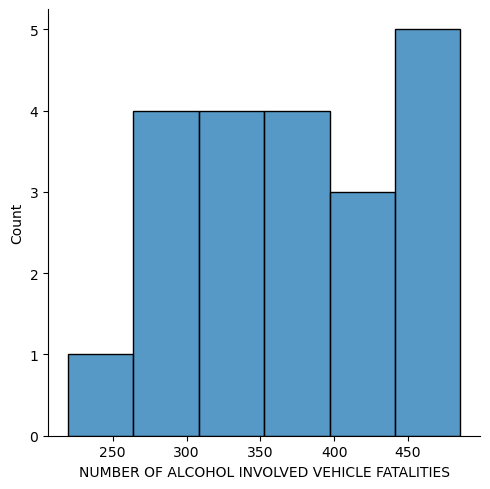

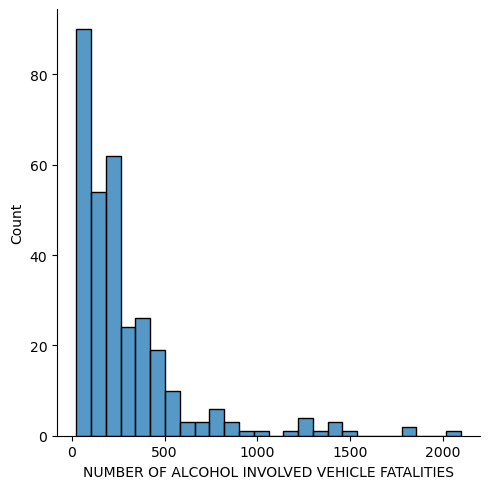

In [9]:
df1 = df[df['TAX ON CASE OF BEER'] > 1.5]['NUMBER OF ALCOHOL INVOLVED VEHICLE FATALITIES']
print(max(df1))
df2 = df[df['TAX ON CASE OF BEER'] <= 1.5]['NUMBER OF ALCOHOL INVOLVED VEHICLE FATALITIES']
print(max(df2))
print(max(df['YEAR']))

sns.displot(data=df, x=df1)
sns.displot(data=df, x=df2)


It's clear that based on the x-axis, that a higher tax on beer results in fewer alcohol involved vehicle fatalities. The maximum number of accidents with a beer tax greater than 1.5% is 485 compared to 2095 accidents with a lower tax on beer. 

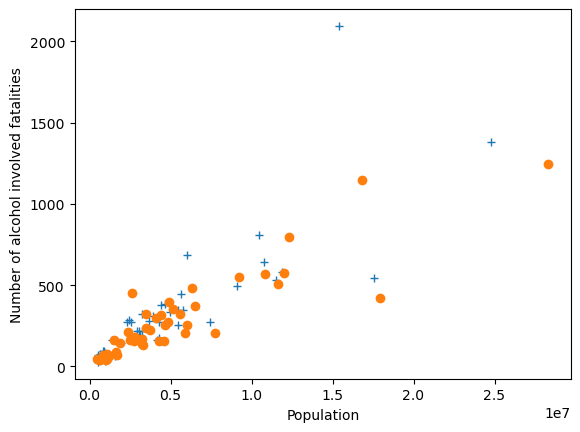

In [10]:
#print(len(df['YEAR'] == 1985))
#print(len(df[df['YEAR'] == 1985]['NUMBER OF ALCOHOL INVOLVED VEHICLE FATALITIES']))
#plt.plot(df['YEAR' == 1985], df[df['YEAR' == 1985]]['NUMBER OF ALCOHOL INVOLVED VEHICLE FATALITIES'])
#plt.show()

x = df[df['YEAR'] == 1982]['POPULATION']
y = df[df['YEAR'] == 1982]['NUMBER OF ALCOHOL INVOLVED VEHICLE FATALITIES']

x2 = df[df['YEAR'] == 1988]['POPULATION']
y2 = df[df['YEAR'] == 1988]['NUMBER OF ALCOHOL INVOLVED VEHICLE FATALITIES']

plt.plot(x, y,'+')
plt.plot(x2, y2, 'o')
plt.xlabel('Population')
plt.ylabel('Number of alcohol involved fatalities')
plt.show()

The graph describes the relationship between the US population to the number of alcohol involved fatalities in the years 1982 and 1988. There appears to have been more accidents in 1982 compared to 1988. This could be due to safety measures taken and police enforcement with drinking and driving. 

/Users/melinakopischkie/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


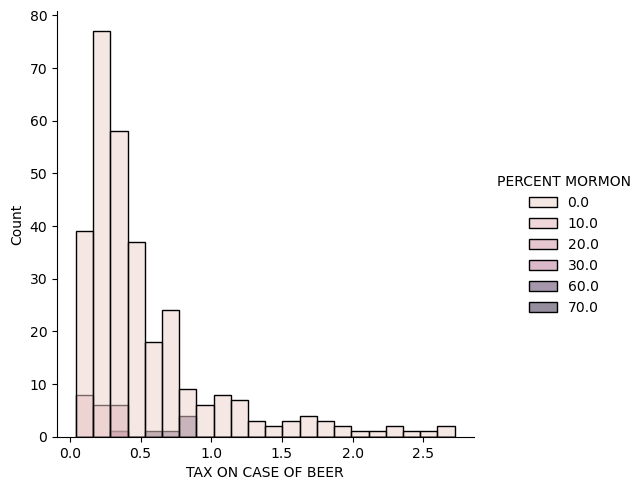

/Users/melinakopischkie/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


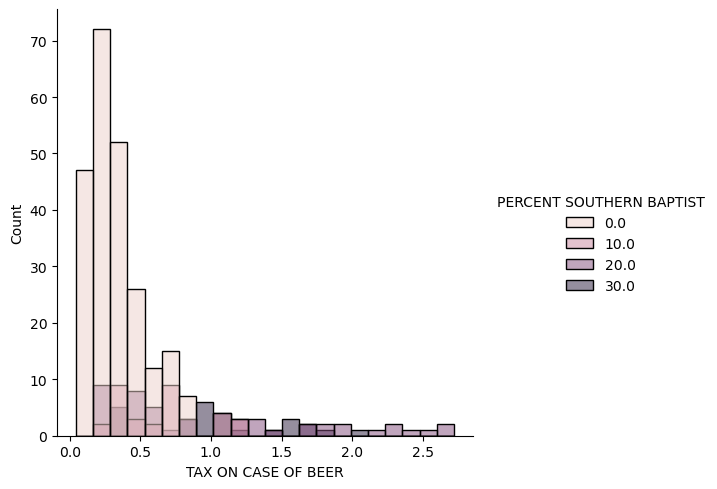

In [11]:
mormon = max(df['PERCENT MORMON'])
not_mormon = min(df['PERCENT MORMON'])

#print(df[df['PERCENT MORMON'] == mormon]['STATE'])
#print(df[df['PERCENT MORMON'] == not_mormon]['STATE'])


x3 = df[df['STATE'] == 'ut']['TAX ON CASE OF BEER']
#y3 = df[df['STATE'] == 'ut']['NUMBER OF VEHICLE FATALITIES 15-17 YEARS']

#x4 = df[df['STATE'] == 'ny']['POPULATION 15-17 YEARS']
y4 = df[df['STATE'] == 'ny']['TAX ON CASE OF BEER']

#plt.bar('ny', x3)
#plt.bar('ut', y4)
#plt.plot(x4, y4, 'o')
#plt.show()

percent_mormon_round = np.round(df['PERCENT MORMON'], decimals=-1)

sns.displot(data=df, x='TAX ON CASE OF BEER', hue=percent_mormon_round)
plt.show()

percent_south_bap_round = np.round(df['PERCENT SOUTHERN BAPTIST'], decimals=-1)

sns.displot(data=df, x='TAX ON CASE OF BEER', hue=percent_south_bap_round)
plt.show()

Religious affiliations appear to have an impact on the tax charged on a case of beer. Specifically, areas with a higher percentage of south baptist compared to mormon have a larger tax on beer. 

/Users/melinakopischkie/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


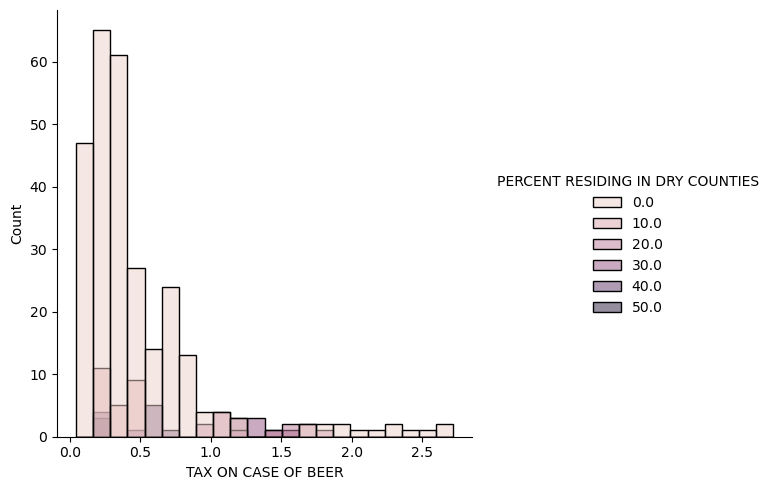

In [12]:
percent_dry_count_round = np.round(df['PERCENT RESIDING IN DRY COUNTIES'], decimals=-1)

sns.displot(data=df, x='TAX ON CASE OF BEER', hue=percent_dry_count_round)
plt.show()



Aside from religious affiliations, people residing in dry counties typically have a slightly higher tax on beer compared to those not residing in dry counties. Although, this does not have as strong of a correlation compared to the religious affiliations. 

['az' 'ct' 'ks' 'la' 'me' 'mt' 'nv' 'oh' 'or' 'sc' 'tn' 'ut' 'wa' 'wv'
 'wy']
['al' 'ar' 'ca' 'co' 'ct' 'de' 'fl' 'ga' 'id' 'il' 'in' 'ia' 'ky' 'md'
 'ma' 'mi' 'mn' 'ms' 'mo' 'ne' 'nv' 'nh' 'nj' 'nm' 'ny' 'nc' 'nd' 'oh'
 'ok' 'or' 'pa' 'ri' 'sc' 'sd' 'tx' 'ut' 'vt' 'va' 'wi']


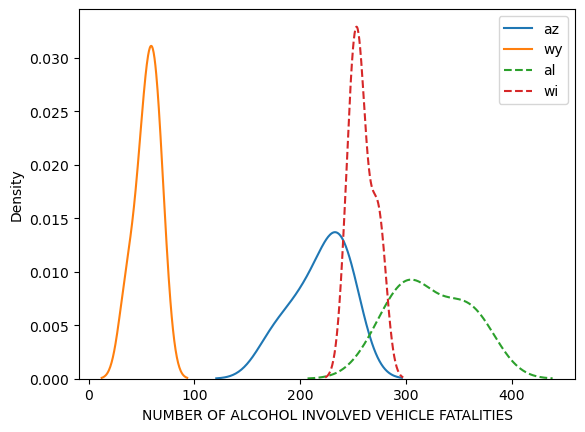

In [13]:
oiahj = df[df['MANDATORY JAIL SENTENCE'] == 'yes']['STATE'].unique()
print(oiahj)

cbey = df[df['MANDATORY JAIL SENTENCE'] == 'no']['STATE'].unique()
print(cbey)

#print(df[df['NUMBER OF ALCOHOL INVOLVED VEHICLE FATALITIES']]['STATE'] == oiahj[0])

sns.kdeplot(data = df, x=df[df['STATE'] == oiahj[0]]['NUMBER OF ALCOHOL INVOLVED VEHICLE FATALITIES'], 
            label=oiahj[0])
sns.kdeplot(data = df, x=df[df['STATE'] == oiahj[14]]['NUMBER OF ALCOHOL INVOLVED VEHICLE FATALITIES'], 
           label=oiahj[14])



sns.kdeplot(data = df, x=df[df['STATE'] == cbey[0]]['NUMBER OF ALCOHOL INVOLVED VEHICLE FATALITIES'], 
            linestyle='--', label=cbey[0])
sns.kdeplot(data = df, x=df[df['STATE'] == cbey[38]]['NUMBER OF ALCOHOL INVOLVED VEHICLE FATALITIES'], 
            linestyle='--', label=cbey[38])

plt.legend()
plt.show()

My hypothesis earlier was correct in that a mandatory jail sentence provides more incentive to not drink and drive as compared to mandatory community service. The states with the solid filled lines are those where there is a mandatory jail time and the states with the dashed line have no mandatory jail time. 

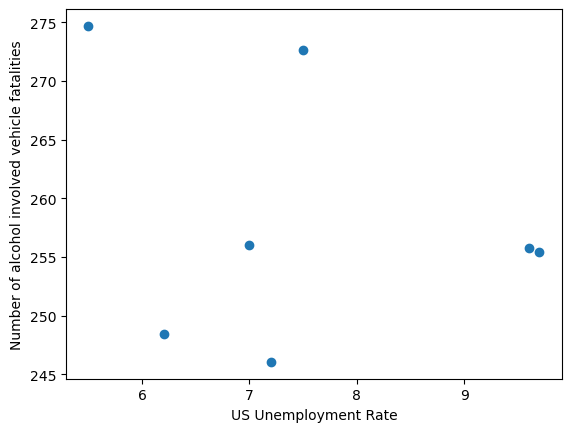

In [14]:
x5 = df[df['STATE'] == 'wi']['US UNEMPLOYMENT RATE']
y5 = df[df['STATE'] == 'wi']['NUMBER OF ALCOHOL INVOLVED VEHICLE FATALITIES']

plt.scatter(x5, y5)
plt.xlabel('US Unemployment Rate')
plt.ylabel('Number of alcohol involved vehicle fatalities')
plt.show()

There is no clear correlation between the unemployment rate and alcohol related fatalities in wisconsin, we can see that the most amount of accidents happened with the unemployment rate was lower. This surprises me as I thought that people would be more cautious if employed. 

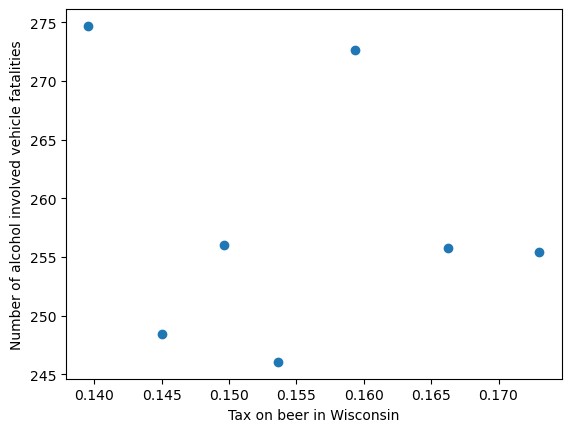

In [15]:
x6 = df[df['STATE'] == 'wi']['TAX ON CASE OF BEER']
y6 = df[df['STATE'] == 'wi']['NUMBER OF ALCOHOL INVOLVED VEHICLE FATALITIES']

plt.scatter(x6, y6)
plt.xlabel('Tax on beer in Wisconsin')
plt.ylabel('Number of alcohol involved vehicle fatalities')
plt.show()

Similar to the unemployment relationship, the tax on beer doesn't have a clear correlation with the number of vehicle fatalities. But, again we do see that the most accidents occur with a lower tax on beer. This makes more sense to me as people would be able to buy more beer with less tax. 

/Users/melinakopischkie/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


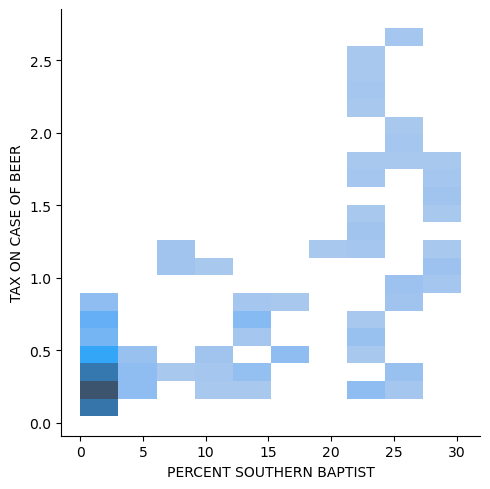

In [16]:
#x5 = df[df['STATE'] == 'STATE']['US UNEMPLOYMENT RATE']
#y5 = df[df['STATE'] == 'STATE']['NUMBER OF ALCOHOL INVOLVED VEHICLE FATALITIES']

#plt.scatter(x5, y5)
#plt.show()

sns.displot(data=df, x='PERCENT SOUTHERN BAPTIST', y = 'TAX ON CASE OF BEER')
plt.show()

We see here that a higher precentage of southern baptist often results in a higher tax on a case of beer. With a smaller percent of southern baptist, the tax remains under $1, but with a higher percentage, we see taxes of up to $2. 

[]

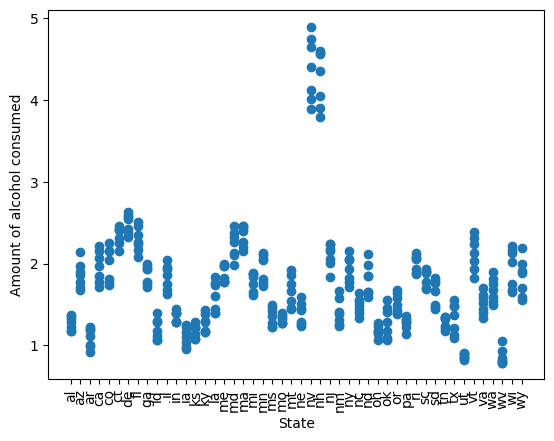

In [17]:
plt.scatter(df['STATE'], df['AMOUNT OF ALCOHOL CONSUMED'])
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Amount of alcohol consumed')
plt.plot()

Here, I wanted to see the amount of alcohol consumed by each state to isolate the states that drink the most and the least

In [18]:
max_alc = max(df['AMOUNT OF ALCOHOL CONSUMED'])
print(df['STATE'][df['AMOUNT OF ALCOHOL CONSUMED'] == max_alc])
min_alc = min(df['AMOUNT OF ALCOHOL CONSUMED'])
print(df['STATE'][df['AMOUNT OF ALCOHOL CONSUMED'] == min_alc])


176    nv
Name: STATE, dtype: object
321    wv
322    wv
Name: STATE, dtype: object


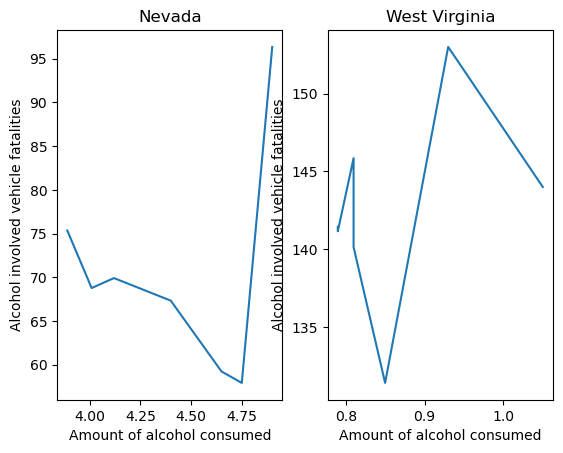

In [19]:
plt.subplot(1,2,1)
plt.plot(df['AMOUNT OF ALCOHOL CONSUMED'][df['STATE'] == 'nv'], 
           df['NUMBER OF ALCOHOL INVOLVED VEHICLE FATALITIES'][df['STATE'] == 'nv'])
plt.xlabel('Amount of alcohol consumed')
plt.ylabel('Alcohol involved vehicle fatalities')
plt.title('Nevada')
plt.subplot(1,2,2)
plt.plot(df['AMOUNT OF ALCOHOL CONSUMED'][df['STATE'] == 'wv'], 
           df['NUMBER OF ALCOHOL INVOLVED VEHICLE FATALITIES'][df['STATE'] == 'wv'])
plt.xlabel('Amount of alcohol consumed')
plt.ylabel('Alcohol involved vehicle fatalities')
plt.title('West Virginia')

plt.show()

The pattern here surprised me as people from Nevada consume more alcohol, but have fewer vehicle fatalities, whereas West Virginia consumes less alcohol but has more alcohol related accidents. 

/Users/melinakopischkie/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/melinakopischkie/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


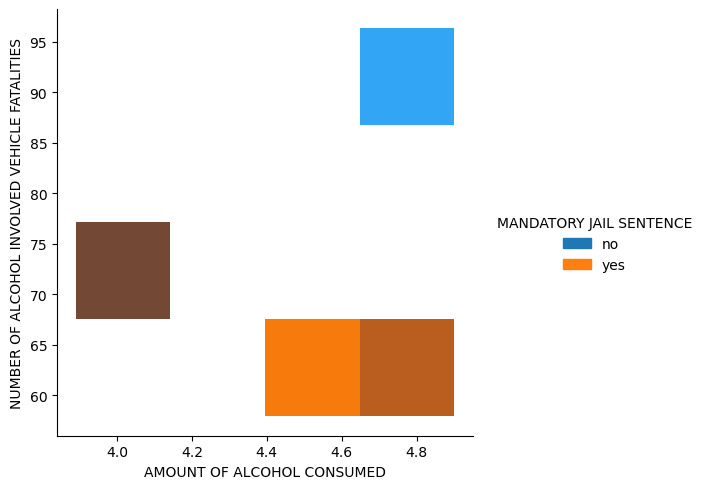

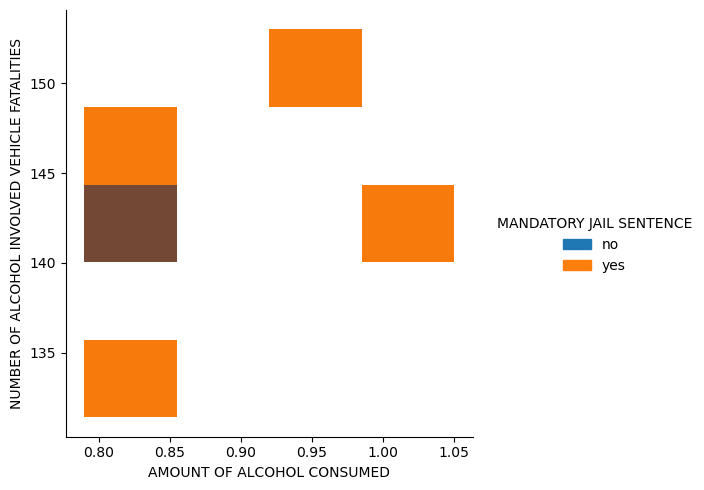

In [20]:
#plt.subplot(1,2,1)
#plt.plot(df['AMOUNT OF ALCOHOL CONSUMED'][df['STATE'] == 'nv'], 
 #          df['MANDATORY JAIL SENTENCE'][df['STATE'] == 'nv'])

#plt.subplot(1,2,2)
#plt.plot(df['AMOUNT OF ALCOHOL CONSUMED'][df['STATE'] == 'wv'], 
#           df['MANDATORY JAIL SENTENCE'][df['STATE'] == 'wv'])

#plt.show()
sns.displot(data=df, x=df['AMOUNT OF ALCOHOL CONSUMED'][df['STATE'] == 'nv'], 
            y=df['NUMBER OF ALCOHOL INVOLVED VEHICLE FATALITIES'][df['STATE'] == 'nv'], 
            hue='MANDATORY JAIL SENTENCE')

sns.displot(data=df, x=df['AMOUNT OF ALCOHOL CONSUMED'][df['STATE'] == 'wv'], 
            y=df['NUMBER OF ALCOHOL INVOLVED VEHICLE FATALITIES'][df['STATE'] == 'wv'], 
            hue='MANDATORY JAIL SENTENCE')

plt.show()

A mandatory jail sentence does not appear to have much correlation with the amount of alcohol consumed in nevada and west virginia. And actually, there is a mandatory jail sentence in nevada and still has a large amount of alcohol related car accidents.

In [21]:
df1 = pd.read_csv('movie.csv', index_col=0)

    - What are your initial thoughts on the dataset? 
    - What do you think can be mined from the dataset?
    - What are the hypotheses that you can make?
    - What are your observations based on plots ( at least 10 plots)

Initial thoughts: 
Originally, I thought this data set had more columns to it, so I expect that finding new patterns will be tricky. Also, without any units on the popularity it's hard to understand what scale it operates on. Furthermore, there was no distinction provided between the vote average and vote count, so I have to interpret that the count represents an indivudual rating the movie. I like that the data set contains a description of the movie as it would be useful in performing sentiment analysis on the most popular or least popular movies. 

Mining Potential: 
I think that information can be obtained about the genre of the movie and how popular it will be. I also think it's really important to explore how the release date changes the popularity of a movie and thinking about what metrics could sway that. Furthermore, I think that a correlation could be found between the vote count and the voting average since with more people voting, the more each opinion is open to interpretability. 

Hypothesis: 
I believe that a higher voting count will result in a higher average. Because often times if you see your neighbor ranking something highly, it will influence you to rank it higher. I also think that a less recent release date will generally have less popularity since the target market of people watching movies is most likely younger people. 

In [22]:
df1.head()

,id,title,overview,release_date,popularity,vote_average,vote_count
0,960258,Shark Bait,A group of friends enjoying a weekend steal a ...,2022-05-13,34.679,5.697,318
1,11067,Major League II,"After losing in the ALCS the year before, the ...",1994-03-30,16.374,5.697,320
2,20856,Aliens in the Attic,A group of kids must protect their vacation ho...,2009-07-30,20.437,5.696,973
3,14098,100 Feet,After Marnie Watson kills her abusive husband ...,2008-07-22,18.927,5.696,304
4,11398,The Art of War,Neil Shaw is both agent and weapon - a critica...,2000-08-25,12.022,5.696,477


In [23]:
df1.columns = ['ID', 'TITLE', 'OVERVIEW', 'RELEASE DATE', 'POPULARITY', 'VOTE AVERAGE', 'VOTE COUNT']
df1['RELEASE DATE'] = pd.to_datetime(df1['RELEASE DATE'])
df1['RELEASE DATE'] = df1['RELEASE DATE'].dt.year
df1.head()

,ID,TITLE,OVERVIEW,RELEASE DATE,POPULARITY,VOTE AVERAGE,VOTE COUNT
0,960258,Shark Bait,A group of friends enjoying a weekend steal a ...,2022,34.679,5.697,318
1,11067,Major League II,"After losing in the ALCS the year before, the ...",1994,16.374,5.697,320
2,20856,Aliens in the Attic,A group of kids must protect their vacation ho...,2009,20.437,5.696,973
3,14098,100 Feet,After Marnie Watson kills her abusive husband ...,2008,18.927,5.696,304
4,11398,The Art of War,Neil Shaw is both agent and weapon - a critica...,2000,12.022,5.696,477


In [24]:
df1.describe()

,ID,RELEASE DATE,POPULARITY,VOTE AVERAGE,VOTE COUNT
count,8.580000e+03,8580.000000,8580.000000,8580.000000,8580.000000
mean,1.964095e+05,2003.845338,29.863904,6.804031,2104.044172
std,2.608837e+05,17.755366,53.930147,0.628188,3264.360149
min,2.000000e+00,1902.000000,0.023000,5.688000,300.000000
25%,9.922750e+03,1997.000000,14.722750,6.300000,477.000000
50%,3.461200e+04,2009.000000,20.945500,6.769000,895.000000
75%,3.636032e+05,2017.000000,32.027750,7.272000,2137.500000
max,1.212073e+06,2024.000000,3011.577000,8.706000,36238.000000


In [25]:
df1.dtypes
print(len(df1))
max(df1['POPULARITY'])
min(df1['POPULARITY'])
mean = df1['POPULARITY'].quantile(0.90)
high = df1[df1['POPULARITY'] > mean]['TITLE']
print(high)

8580
20             The Shawshank Redemption
21                        The Godfather
22                The Godfather Part II
23                     Schindler's List
24                         12 Angry Men
                     ...               
8477                             Pixels
8480                             Pixels
8492                     The Dark Tower
8511                           Garfield
8540    Wrong Turn 4: Bloody Beginnings
Name: TITLE, Length: 858, dtype: object


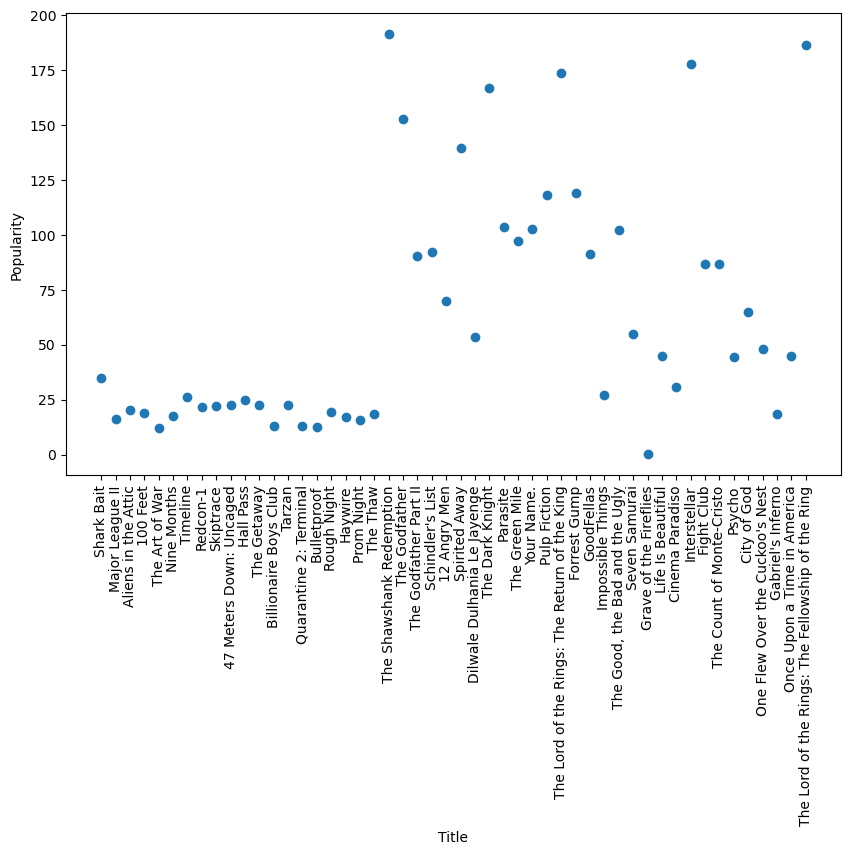

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(df1['TITLE'][0:50], df1['POPULARITY'][0:50])
plt.xticks(rotation=90)
plt.xlabel('Title')
plt.ylabel('Popularity')
plt.show()

Here I wanted to see the relationship between the movie title and it's popularity. This was to mostly get a sense about which movies were the most popular and what genre they belonged to. It seems that action and drama movies general had more popularity

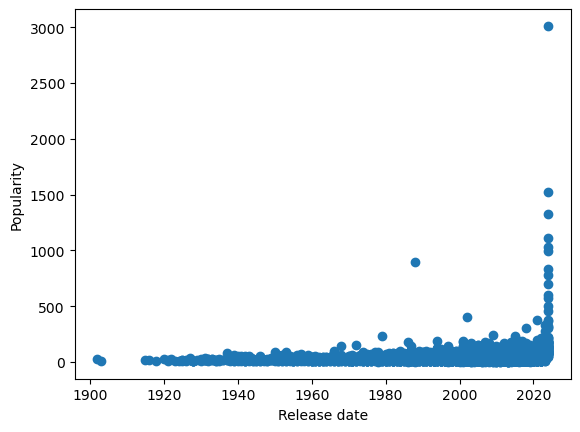

In [27]:
plt.scatter(df1['RELEASE DATE'], df1['POPULARITY'])
plt.xlabel('Release date')
plt.ylabel('Popularity')
plt.show()

I wanted to see whether the release data had a large impact on the popularity of a movie and it does. This makes sense because I previously assumed that more recent movies would be more popular due to a larger target audience and more accessibility. 

0       2022
1       1994
2       2009
3       2008
4       2000
        ... 
8575    1996
8576    2017
8577    2011
8578    1980
8579    2009
Name: RELEASE DATE, Length: 8580, dtype: int32


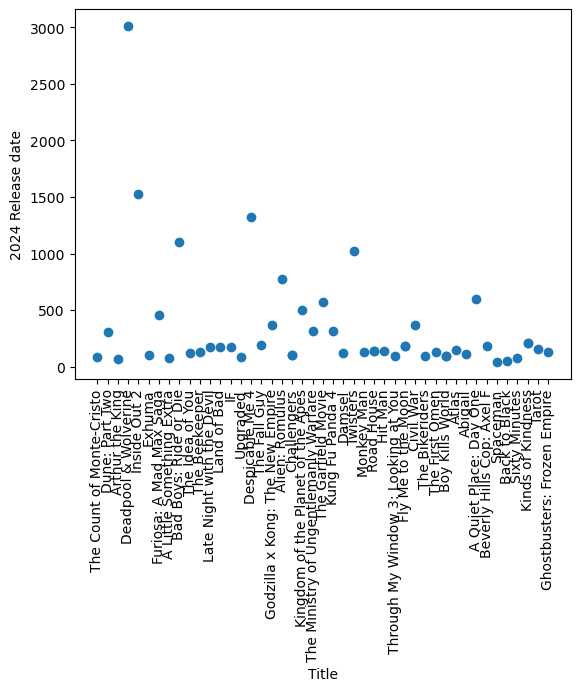

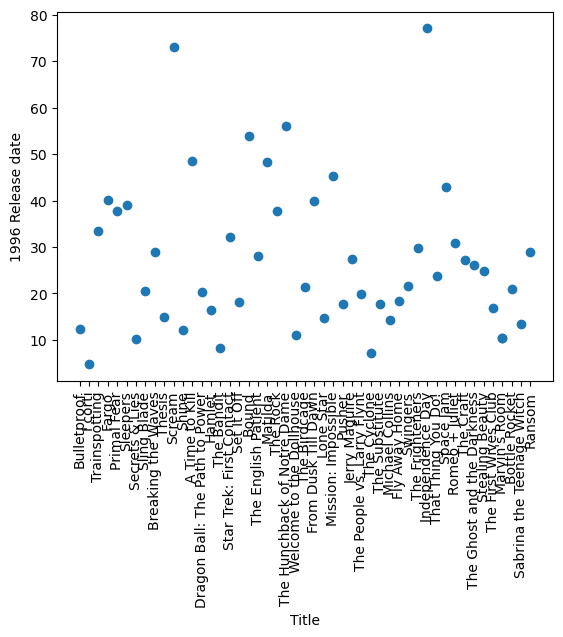

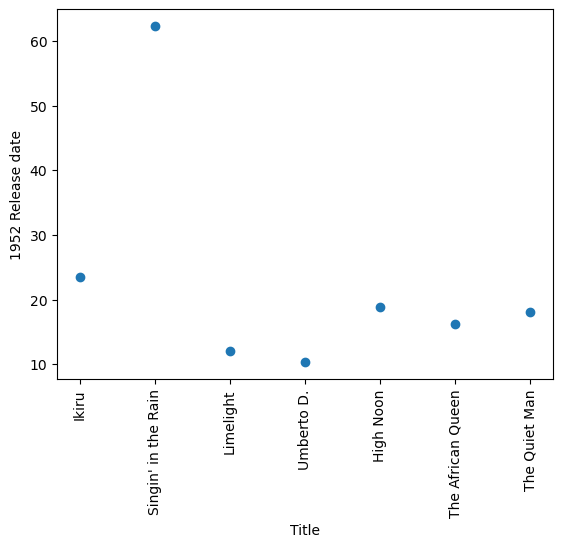

In [28]:
print((df1['RELEASE DATE']))

title2 = df1[df1['RELEASE DATE'] == 2024]['TITLE']
pop2 = df1[df1['RELEASE DATE'] == 2024]['POPULARITY']
plt.scatter(title2[0:50], pop2[0:50])
plt.xticks(rotation=90)
plt.xlabel('Title')
plt.ylabel('2024 Release date')
plt.show()

title = df1[df1['RELEASE DATE'] == 1996]['TITLE']
pop = df1[df1['RELEASE DATE'] == 1996]['POPULARITY']
plt.scatter(title[0:50], pop[0:50])
plt.xticks(rotation=90)
plt.xlabel('Title')
plt.ylabel('1996 Release date')
plt.show()

title1 = df1[df1['RELEASE DATE'] == 1952]['TITLE']
pop1 = df1[df1['RELEASE DATE'] == 1952]['POPULARITY']
plt.scatter(title1, pop1)
plt.xticks(rotation=90)
plt.xlabel('Title')
plt.ylabel('1952 Release date')
plt.show()

I wanted to further confirm that a more recent release date corresponds to higher movie popularity. Looking at the y-axes, we can see that the most popular movies were released over the past year and the least popular movies were released in the 1950s. This could also be attributed to people not watching movies from longer ago.

In [29]:
print(max(df1['VOTE AVERAGE']))
print(min(df1['VOTE AVERAGE']))

8.706
5.688


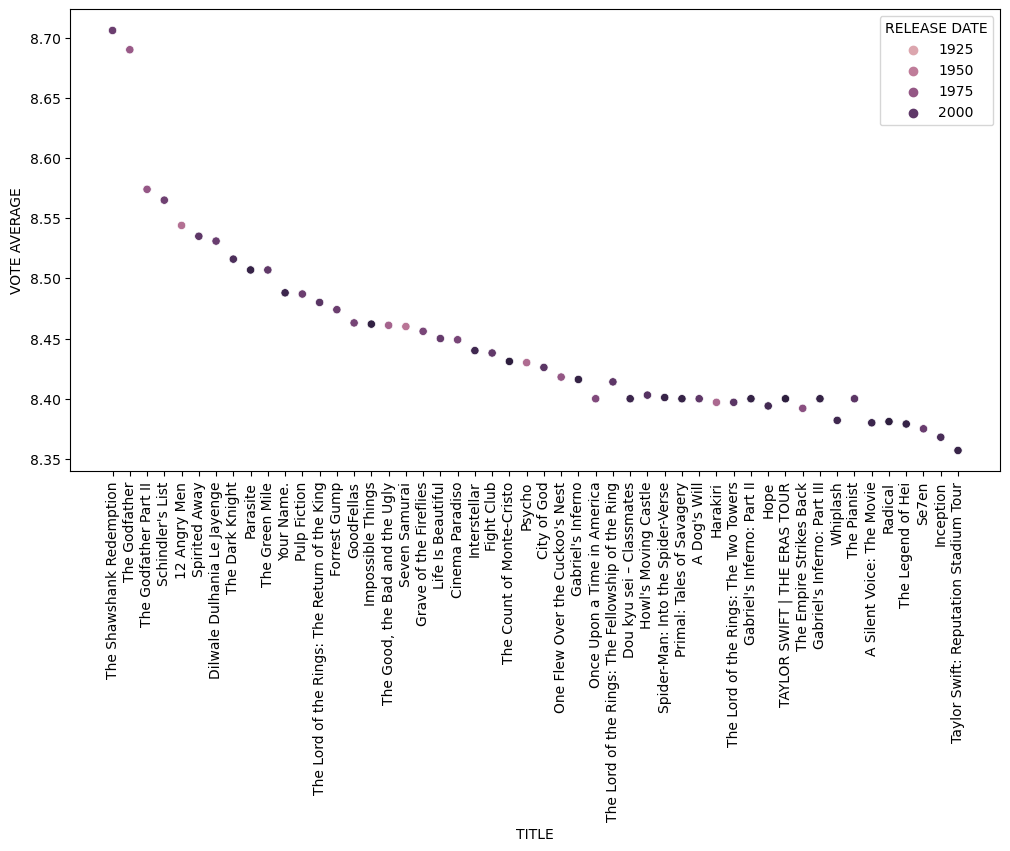

In [30]:
plt.figure(figsize=(12, 6))
title1 = df1[df1['VOTE AVERAGE'] > 8]['TITLE']
pop1 = df1[df1['RELEASE DATE'] == 1952]['POPULARITY']

ibi = df1[df1['VOTE AVERAGE'] > 8]['TITLE']
#print(ibi)
vote = df1[df1['VOTE AVERAGE'] > 8]['VOTE AVERAGE']
#print(vote)
sns.scatterplot(data = df1, x=ibi[0:50], y=vote[0:50], hue='RELEASE DATE')
plt.xticks(rotation=90)
plt.show()

I wanted to see the movies with the highest vote average out of the whole data set and have an idea of when they were released. Again we see that action and drama movies recieved the highest ratings and were generally released more recently. I was somewhat surprised to see that movies from the 1900s had ratings in the 8 range as the current target audience is smaller

0                Shark Bait
1           Major League II
2       Aliens in the Attic
3                  100 Feet
4            The Art of War
               ...         
8575            Bulletproof
8576            Rough Night
8577                Haywire
8578             Prom Night
8579               The Thaw
Name: TITLE, Length: 874, dtype: object


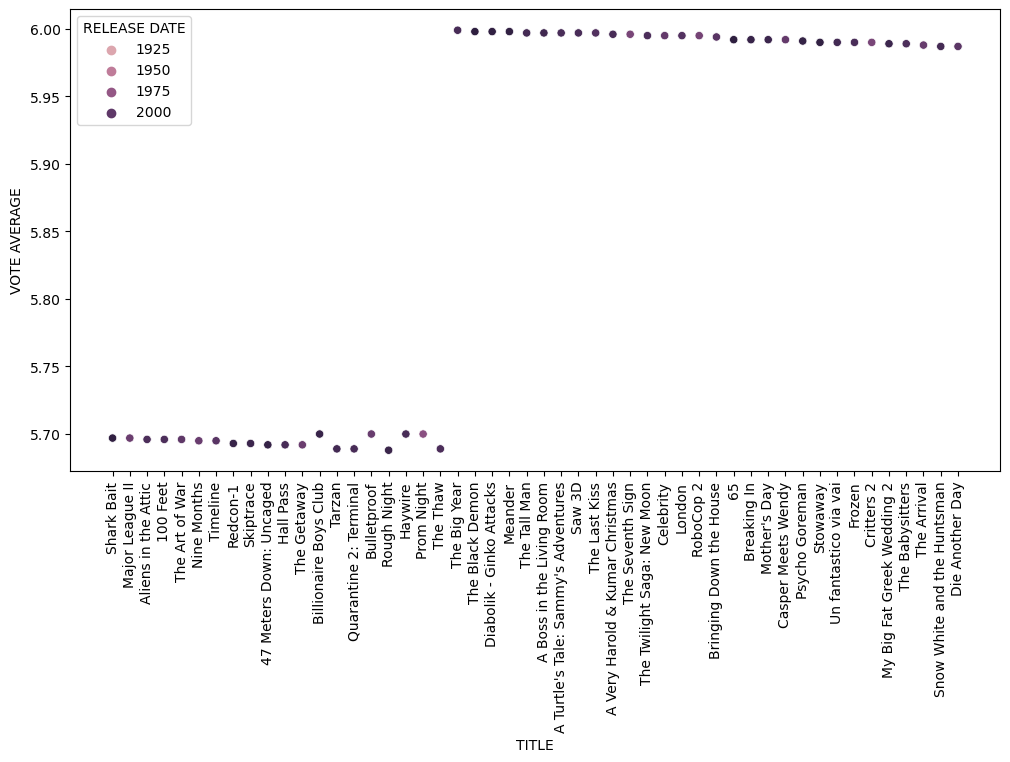

In [31]:
plt.figure(figsize=(12, 6))
title1 = df1[df1['VOTE AVERAGE'] < 5]['TITLE']
pop1 = df1[df1['RELEASE DATE'] == 1952]['POPULARITY']

oinon = df1[df1['VOTE AVERAGE'] < 6]['TITLE']
print(oinon)
vote1 = df1[df1['VOTE AVERAGE'] < 6]['VOTE AVERAGE']
#print(vote)
sns.scatterplot(data = df1, x=oinon[0:50], y=vote1[0:50], hue='RELEASE DATE')
plt.xticks(rotation=90)
plt.show()

Here, I wanted to see the movies with the lowest rating. I figured that it would be more movies from the 1900s, not because their bad, but because I imagine that the people watching the most movies are children. Which is why I was more surprised to see movies such as Frozen and Tarzan in this list. 

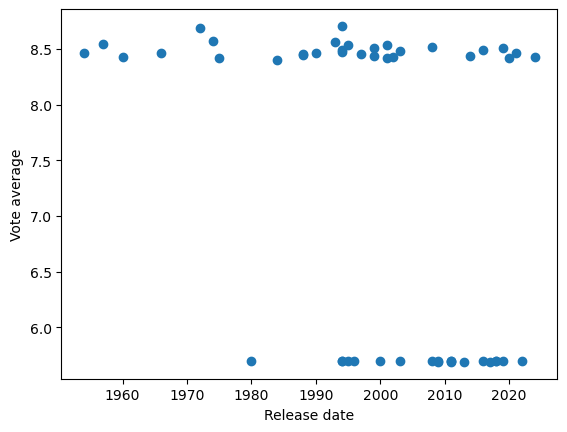

In [32]:
plt.scatter(df1['RELEASE DATE'][0:50], df1['VOTE AVERAGE'][0:50])
plt.xlabel('Release date')
plt.ylabel('Vote average')
plt.show()

I'm again surprised that the movies shown in this graph from the 1960s and 70s recieved high ratings in general. The range from the mid 90s to 2020 makes sense to me because with a wider variety of movies being produced, there is sure to be a fluxuating range of quality movies. I would like to make a note that I am only graphing the first 50 values because the data set it very large and since it is not organized in a particular order, I felt that the first 50 entires would be a good sample. 

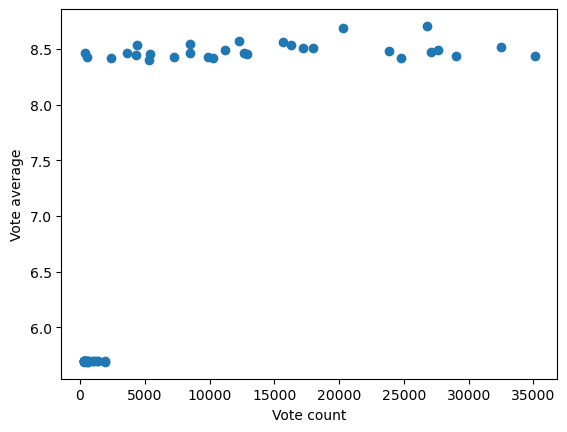

In [33]:
plt.scatter(df1['VOTE COUNT'][0:50], df1['VOTE AVERAGE'][0:50])
plt.xlabel('Vote count')
plt.ylabel('Vote average')
plt.show()

After some digging, I began to question what was meant by voting average versus voting count. From this graph, I can see that the count indicates how many individuals took part in the voting, and the average is what is was ranked among the individuals. It doesn't surprise me that with more voters, the average was larger. This is because with more movies available, people can more aware of low quality movies, and if someone sees their neighbor ranking a movie highly, they are more inclined to also rank highly. 

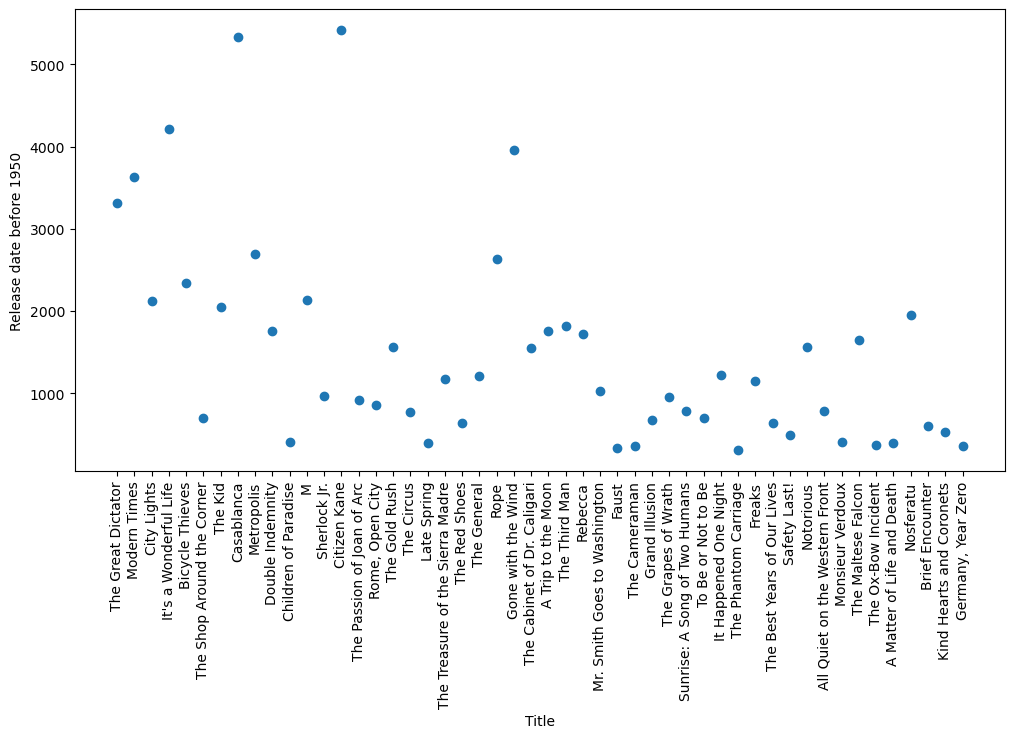

In [34]:
plt.figure(figsize=(12, 6))
cnt = df1[df1['RELEASE DATE'] < 1950]['VOTE COUNT']
mv = df1[df1['RELEASE DATE'] < 1950]['TITLE']
plt.scatter(mv[0:50], cnt[0:50])
plt.xticks(rotation=90)
plt.xlabel('Title')
plt.ylabel('Release date before 1950')
plt.show()

I wanted to see if the amount of people voting had an impact on the vote average a movie recieved in the 50s compared to after the 50s. In this graph, the maximum individuals voting is 5000s with a mean most likely around 2000. 

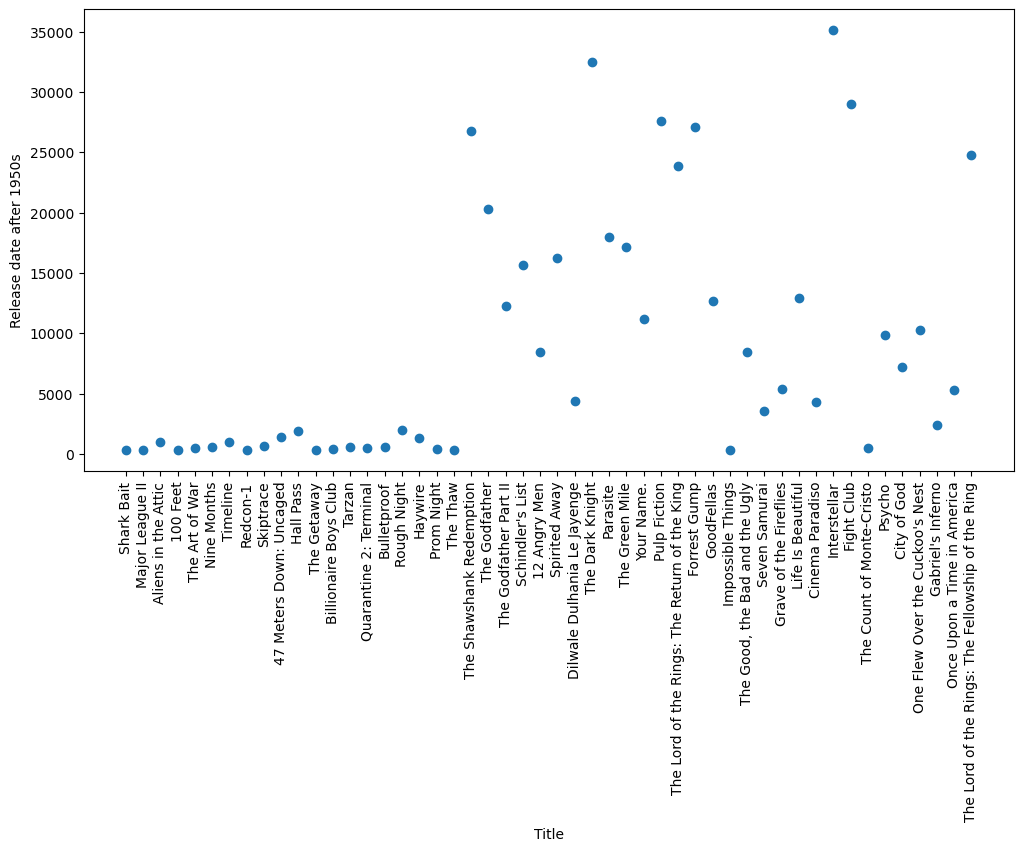

In [35]:
plt.figure(figsize=(12, 6))
cnt1 = df1[df1['RELEASE DATE'] > 1950]['VOTE COUNT']
mv1 = df1[df1['RELEASE DATE'] > 1950]['TITLE']
plt.scatter(mv1[0:50], cnt1[0:50])
plt.xticks(rotation=90)
plt.xlabel('Title')
plt.ylabel('Release date after 1950s')
plt.show()

The movies released after the 1950s had many more people reviewing and voting on the quality. Now the maximum gets up to 35,000. This correlates with my previous graph comparing voting average to voting count, where a larger voting count correlates to a higher voting average. So it begs the question whether the quality of movies is getting better, or if we just have more people voting on the quality, swaying the average. 